In [ ]:
!ls

sample_data


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!wget -qq https://www.dropbox.com/s/vj61417lofjebju/utils.zip
!wget -qq https://www.dropbox.com/s/pcv5wpk0ybsohib/flowers.zip


!unzip -qq flowers.zip
!rm flowers.zip

!unzip -qq utils.zip
!rm utils.zip


!ls

flowers  gdrive.py  __MACOSX  sample_data  sutils.py


In [ ]:
!ls flowers

daisy  dandelion  rose	sunflower  tulip


In [ ]:
!ls flowers/rose

10090824183_d02c613f10_m.jpg  4612833069_8e48b47aa4_n.jpg
102501987_3cdb8e5394_n.jpg    4625089819_55c45a189c.jpg
10503217854_e66a804309.jpg    4644336779_acd973528c.jpg
10894627425_ec76bbc757_n.jpg  4648680921_80dfc4f12a.jpg
110472418_87b6a3aa98_m.jpg    4654893119_45d232016b.jpg
11102341464_508d558dfc_n.jpg  466486216_ab13b55763.jpg
11233672494_d8bf0a3dbf_n.jpg  4675532860_890504a4a3_m.jpg
11694025703_9a906fedc1_n.jpg  4684127262_6c3346188d.jpg
118974357_0faa23cce9_n.jpg    4694341873_65fe187a4e_n.jpg
11944957684_2cc806276e.jpg    4702438868_278b9cf41c_n.jpg
12202373204_34fb07205b.jpg    4703837996_d3c1df77cc_n.jpg
12238827553_cf427bfd51_n.jpg  4713531680_1110a2fa07_n.jpg
12240165555_98625b1e88_n.jpg  4713533500_fcc295de70_n.jpg
12240303_80d87f77a3_n.jpg     4735314389_94fe1b2a9f_n.jpg
12240577184_b0de0e53ea_n.jpg  4754734410_94d98463a5.jpg
12243068283_ee4c2683e2_n.jpg  475947979_554062a608_m.jpg
12243069253_e512464095_n.jpg  4764674741_82b8f93359_n.jpg
123128873_546b8b7355_n.jpg    

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


from sutils import *
import os, json
from glob import glob
import numpy as np

import keras

from tensorflow.keras import optimizers

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16


from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.models import Model,load_model,Sequential

from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.python.keras import backend as K

from tensorflow.keras.callbacks import ModelCheckpoint, Callback

Using TensorFlow backend.


In [ ]:
print(tf.__version__)
print(tf.keras.__version__)
print(keras.__version__)

1.12.0
2.1.6-tf
2.2.4


In [ ]:
!ls flowers

daisy  dandelion  rose	sunflower  tulip


In [ ]:
batch_size = 32
epochs = 10

lr = 0.001

In [ ]:
import glob
import pandas as pd

filenames_n0 = glob.glob('./flowers/daisy/*.jpg')
filenames_n1 = glob.glob('./flowers/dandelion/*.jpg')
filenames_n2 = glob.glob('./flowers/rose/*.jpg')
filenames_n3 = glob.glob('./flowers/sunflower/*.jpg')
filenames_n4 = glob.glob('./flowers/tulip/*.jpg')

names = ['daisy', 'dandelion','rose','sunflower','tulip']


len(filenames_n1)

1024

In [ ]:
filenames_n3[:10]

['./flowers/sunflower/417251603_69f0ee57a9_m.jpg',
 './flowers/sunflower/15122112402_cafa41934f.jpg',
 './flowers/sunflower/7728953426_abd179ab63.jpg',
 './flowers/sunflower/3766264038_ea701c7131_n.jpg',
 './flowers/sunflower/20148493928_9f75a99783.jpg',
 './flowers/sunflower/19756232959_17cde3b9f0_m.jpg',
 './flowers/sunflower/2894191705_a1d2d80c80.jpg',
 './flowers/sunflower/215798352_184d8040d1.jpg',
 './flowers/sunflower/184683023_737fec5b18.jpg',
 './flowers/sunflower/5091281256_648c37d7c1_n.jpg']

In [ ]:
df = pd.DataFrame(filenames_n0, columns = ["filename"])
df2 = pd.DataFrame(filenames_n1, columns = ["filename"])
df3 = pd.DataFrame(filenames_n2, columns = ["filename"])
df4 = pd.DataFrame(filenames_n3, columns = ["filename"])
df5 = pd.DataFrame(filenames_n4, columns = ["filename"])

df.head()

,filename
0,./flowers/daisy/33855966243_01b2486428_n.jpg
1,./flowers/daisy/14921511479_7b0a647795.jpg
2,./flowers/daisy/3326037909_b5ae370722_n.jpg
3,./flowers/daisy/538920244_59899a78f8_n.jpg
4,./flowers/daisy/5632774792_0fa33d17eb_n.jpg


In [ ]:
df['class'] = pd.Series([0 for x in range(len(df.index))], index=df.index)
df2['class'] = pd.Series([1 for x in range(len(df2.index))], index=df2.index)
df3['class'] = pd.Series([2 for x in range(len(df3.index))], index=df3.index)
df4['class'] = pd.Series([3 for x in range(len(df4.index))], index=df4.index)
df5['class'] = pd.Series([4 for x in range(len(df5.index))], index=df5.index)

df.head()

,filename,class
0,./flowers/daisy/33855966243_01b2486428_n.jpg,0
1,./flowers/daisy/14921511479_7b0a647795.jpg,0
2,./flowers/daisy/3326037909_b5ae370722_n.jpg,0
3,./flowers/daisy/538920244_59899a78f8_n.jpg,0
4,./flowers/daisy/5632774792_0fa33d17eb_n.jpg,0


In [ ]:
df3.head()

,filename,class
0,./flowers/rose/4612784323_0bcfb978f0_n.jpg,2
1,./flowers/rose/898102603_2d5152f09a.jpg,2
2,./flowers/rose/3526860692_4c551191b1_m.jpg,2
3,./flowers/rose/8125886145_ae99f91fd0.jpg,2
4,./flowers/rose/7470985688_c1ee9105fa_n.jpg,2


In [ ]:
train_set_percentage = .9


train_df = df[:int(len(df)*train_set_percentage)]
val_df = df[int(len(df)*train_set_percentage):]

train_df2 = df2[:int(len(df2)*train_set_percentage)]
val_df2 = df2[int(len(df2)*train_set_percentage):]

train_df3 = df3[:int(len(df3)*train_set_percentage)]
val_df3 = df3[int(len(df3)*train_set_percentage):]

train_df4 = df4[:int(len(df4)*train_set_percentage)]
val_df4 = df4[int(len(df4)*train_set_percentage):]

train_df5 = df5[:int(len(df5)*train_set_percentage)]
val_df5 = df5[int(len(df5)*train_set_percentage):]



df_new_train = pd.concat([train_df, train_df2, train_df3, train_df4, train_df5])
df_new_val = pd.concat([val_df, val_df2, val_df3, val_df4, val_df5])

df_new_train.shape


df = df_new_train.sample(frac=1).reset_index(drop=True)
df_val = df_new_val.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,filename,class
0,./flowers/dandelion/7280222348_a87725ca77.jpg,1
1,./flowers/tulip/7047408023_6e98fd1e3f.jpg,4
2,./flowers/dandelion/20179380768_7a2990d4e3_n.jpg,1
3,./flowers/rose/9160289562_ab2718d19b.jpg,2
4,./flowers/daisy/14554906452_35f066ffe9_n.jpg,0


In [ ]:
print(df.shape)
print(df_val.shape)

df['class'].unique()

(3664, 2)
(410, 2)


array([1, 4, 2, 0, 3])

1    921
4    816
2    657
0    648
3    622
Name: class, dtype: int64


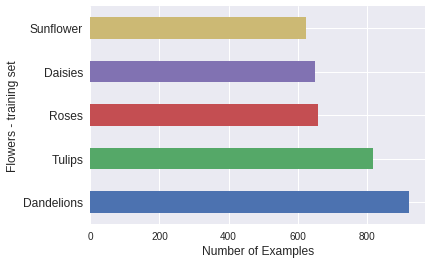

In [ ]:
print(df['class'].value_counts())


ax = df['class'].value_counts().plot.barh()
ax.set_xlabel("Number of Examples", fontsize=12)
ax.set_ylabel("Flowers - training set", fontsize=12)
ax.set_yticklabels(['Dandelions','Tulips','Roses','Daisies','Sunflower'], rotation=0, fontsize=12)
plt.show()

In [ ]:
train_filenames_list = df["filename"].tolist()
train_labels_list = df["class"].astype('int32').tolist()

val_filenames_list = df_val["filename"].tolist()
val_labels_list = df_val["class"].astype('int32').tolist()

num_classes = 5

df.shape

(3664, 2)

In [ ]:
img_rows, img_cols = 299,299

def _parse_function(filename, label):
  image_string = tf.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string)
  image_resized = tf.image.resize_images(image_decoded, [img_rows, img_cols])
  label = tf.one_hot(label, num_classes)
  return image_resized, label

In [ ]:
filenames = tf.constant(train_filenames_list)

labels = tf.constant(train_labels_list)

val_filenames = tf.constant(val_filenames_list)
val_labels = tf.constant(val_labels_list)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
train_dataset = train_dataset.map(_parse_function)
train_dataset = train_dataset.repeat(100)
train_dataset = train_dataset.batch(32)

In [ ]:
valid_dataset = tf.data.Dataset.from_tensor_slices((val_filenames, val_labels))
valid_dataset = valid_dataset.map(_parse_function)
valid_dataset = valid_dataset.repeat(100)
valid_dataset = valid_dataset.batch(32)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((val_filenames, val_labels))
test_dataset = test_dataset.map(_parse_function)
test_dataset = test_dataset.repeat(100)
test_dataset = test_dataset.batch(32)

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    if 'batch' in layer.name:
      print(layer.name)
      layer.trainable = True
    else:
      layer.trainable = False

batch_normalization
batch_normalization_1
batch_normalization_2
batch_normalization_3
batch_normalization_4
batch_normalization_8
batch_normalization_6
batch_normalization_9
batch_normalization_5
batch_normalization_7
batch_normalization_10
batch_normalization_11
batch_normalization_15
batch_normalization_13
batch_normalization_16
batch_normalization_12
batch_normalization_14
batch_normalization_17
batch_normalization_18
batch_normalization_22
batch_normalization_20
batch_normalization_23
batch_normalization_19
batch_normalization_21
batch_normalization_24
batch_normalization_25
batch_normalization_27
batch_normalization_28
batch_normalization_26
batch_normalization_29
batch_normalization_34
batch_normalization_35
batch_normalization_31
batch_normalization_36
batch_normalization_32
batch_normalization_37
batch_normalization_30
batch_normalization_33
batch_normalization_38
batch_normalization_39
batch_normalization_44
batch_normalization_45
batch_normalization_41
batch_normalization_46


In [ ]:
for layer in model.layers:
    print(layer.name)
    print(layer.trainable)

In [ ]:
opt = optimizers.Adam(lr)

In [ ]:
model.compile(optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
!mkdir checkpoints


checkpoint = ModelCheckpoint('./checkpoints/weights_{epoch:02d}_{val_acc:.2f}.hdf5', verbose=1, save_best_only=True, mode='auto')

In [ ]:
train_steps = 100
val_steps = 50
epochs = 5

In [ ]:
history = model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                   callbacks=[checkpoint])

Epoch 1/5
 99/100 [============================>.] - ETA: 0s - loss: 0.8061 - acc: 0.7282
Epoch 00001: val_loss improved from inf to 0.42642, saving model to ./checkpoints/weights_01_0.85.hdf5
100/100 [==============================] - 148s 1s/step - loss: 0.8015 - acc: 0.7291 - val_loss: 0.4264 - val_acc: 0.8519
Epoch 2/5
 99/100 [============================>.] - ETA: 0s - loss: 0.3403 - acc: 0.8782
Epoch 00002: val_loss improved from 0.42642 to 0.37790, saving model to ./checkpoints/weights_02_0.87.hdf5
100/100 [==============================] - 105s 1s/step - loss: 0.3388 - acc: 0.8791 - val_loss: 0.3779 - val_acc: 0.8669
Epoch 3/5
 99/100 [============================>.] - ETA: 0s - loss: 0.2882 - acc: 0.8955
Epoch 00003: val_loss improved from 0.37790 to 0.30995, saving model to ./checkpoints/weights_03_0.90.hdf5
100/100 [==============================] - 105s 1s/step - loss: 0.2872 - acc: 0.8959 - val_loss: 0.3099 - val_acc: 0.8975
Epoch 4/5
 99/100 [============================

In [ ]:
history = model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                   callbacks=[checkpoint])

Epoch 1/5
 99/100 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9624
Epoch 00001: val_loss improved from 0.28365 to 0.28215, saving model to ./checkpoints/weights_01_0.92.hdf5
100/100 [==============================] - 105s 1s/step - loss: 0.1067 - acc: 0.9622 - val_loss: 0.2822 - val_acc: 0.9156
Epoch 2/5
 99/100 [============================>.] - ETA: 0s - loss: 0.0903 - acc: 0.9684
Epoch 00002: val_loss did not improve from 0.28215
100/100 [==============================] - 104s 1s/step - loss: 0.0896 - acc: 0.9688 - val_loss: 0.2829 - val_acc: 0.9175
Epoch 3/5
 99/100 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9807
Epoch 00003: val_loss did not improve from 0.28215
100/100 [==============================] - 104s 1s/step - loss: 0.0630 - acc: 0.9803 - val_loss: 0.4172 - val_acc: 0.9025
Epoch 4/5
 99/100 [============================>.] - ETA: 0s - loss: 0.0376 - acc: 0.9874
Epoch 00004: val_loss did not improve from 0.28215
100/100 [=====

In [ ]:
!ls checkpoints

weights_01_0.85.hdf5  weights_02_0.87.hdf5  weights_04_0.90.hdf5
weights_01_0.92.hdf5  weights_03_0.90.hdf5


In [ ]:
model.load_weights('./checkpoints/weights_02_0.91.hdf5')

NotFoundError: ignored

In [ ]:
metrics = model.evaluate(valid_dataset,steps=50)
print("model accuracy:",metrics[1])

50/50 [==============================] - 19s 378ms/step
model accuracy: 0.915625


In [ ]:
metrics = model.evaluate(valid_dataset,steps=50)
print("model accuracy:",metrics[1])

50/50 [==============================] - 19s 376ms/step
model accuracy: 0.915625


In [ ]:
preds = model.predict(test_dataset,steps=10)
preds = preds.argmax(axis=-1)

preds.shape

(320,)

In [ ]:
test_labels = val_labels_list[0:320]

In [ ]:
len(test_labels)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(test_labels,preds)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
cm_plot_labels = names

# # Plot normalized confusion matrix
plt.figure(figsize=(16,8))
plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                      title='Flowers Normalized')

plt.show()

In [ ]:
model.save('flowers.h5')

In [ ]:
model.save_weights('flowers_weights.h5', save_format='h5')

In [ ]:
!ls

In [ ]:
model.save_weights('./flowers_tf')

In [ ]:
!ls

In [ ]:
!wget -qq https://www.dropbox.com/s/iupwkbumwldk9es/testing_flowers.zip


!unzip -qq testing_flowers.zip
!rm testing_flowers.zip



!ls

In [ ]:
!ls testing_flowers

In [ ]:
image_path = './testing_flowers/'

In [ ]:
from IPython.display import Image

image_name = 'sunflower02.jpg'
Image(image_path+image_name)

In [ ]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

img_path = os.path.join(image_path, image_name)
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)
print('Input image shape:', x.shape)

In [ ]:
pred = model.predict(x)
print('Predicted:', pred)

print(np.argmax(pred))

In [ ]:
result= np.argmax(pred)
if result==0:
    print("Its a Daisy")
elif result==1:
    print("Its a Dandelion")
elif result==2:
    print("Its a Rose")
elif result==3:
    print("Its a Sunflower")
elif result==4:
    print("Its a Tulip")

In [ ]:
names

In [ ]:
from google.colab import files

files.download('flowers.h5')

In [ ]:
files.download('flowers_weights.h5')

In [ ]:
estimator = tf.keras.estimator.model_to_estimator(model)

In [ ]:
!kill -9 -1